In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def ShowImage(img, gray):
    plt.axis("off")
    if gray:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.show()

In [2]:
def normalization(shade, scale):
    mn, mx = np.amin(shade), np.amax(shade)
    return (((shade - mn)/(mx-mn))*scale).astype(np.uint8)

In [1]:
def rgb_to_hsi(img):
    R = img[:, :, 2].astype(np.float16)
    G = img[:, :, 1].astype(np.float16)
    B = img[:, :, 0].astype(np.float16)

    I = (R + G + B) / 3.0

    min_rgb = np.minimum.reduce([R, G, B])
    S = 1 - (3.0 / (R + G + B + 1e-6)) * min_rgb

    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G)**2 + (R - B) * (G - B))
    den[den == 0] = 0.0000001  
    theta = np.arccos(num / den)

    H = theta
    H[B > G] = 2 * np.pi - H[B > G]
    H = np.degrees(H)
    return H,S,I

In [7]:
img_rgb = cv2.imread('./images/make_binary.png')

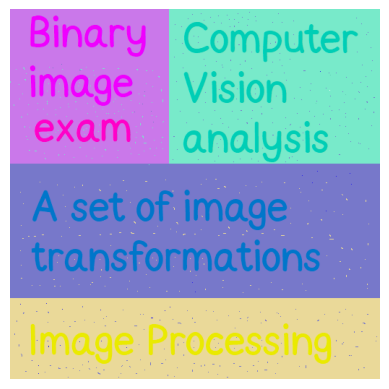

In [8]:
ShowImage(img_rgb, False)

In [9]:
h,s,i = rgb_to_hsi(img_rgb)

In [10]:
print(np.amax(h),np.amax(s),np.amax(i))

358.0 1.0 255.0


In [11]:
h_norm, s_norm, i_norm = normalization(h, 255), normalization(s, 255), normalization(i, 255)
print(np.amax(h_norm),np.amax(s_norm),np.amax(i_norm))


255 255 255


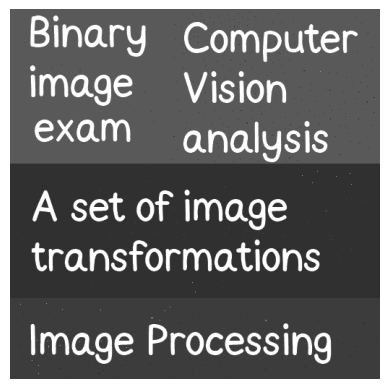

In [13]:
ShowImage(s_norm, True)

## Next Step is to apply filtering and then thresholding algorithm (intermean or Otsu methods to produce a pretty binary image)